# Imports

In [ ]:
import os

import numpy as np
import matplotlib.pyplot as plt

from skimage import io
import skimage

# Download and organize the dataset (No Code required here)

In [ ]:
%%capture

import requests
url = 'http://vision.soic.indiana.edu/egohands_files/egohands_data.zip'
r = requests.get(url, allow_redirects=True)
open('egohands_data.zip', 'wb').write(r.content)

!rm -r data
!rm -r temp
!mkdir data
!mkdir temp
!unzip egohands_data.zip -d temp/
!cp -r /content/temp/_LABELLED_SAMPLES/CARDS_OFFICE_B_S/* /content/data/
!rm /content/data/polygons.mat
!rm -r temp

# Read the images from the folder 'data' into a list



In [ ]:
# os.listdir <-- you may want to use this function

dataset_dir = "data" # this is the directory of the dataset

# Your code here
imgs = list(io.imread_collection(f"{dataset_dir}/*.jpg"))
np.array(imgs).shape
##

(100, 720, 1280, 3)

# Define a function that takes a list of images then samples 9 iamges from the list, then draws them using matplotlib in a 3x3 grid

In [ ]:
import random # u may need this library
random.seed(100) # set a seed in case you want your experiments to be consistent



def draw_func(list_of_imgs):
  # Your code here
  fig = plt.figure(figsize=(15, 10))
  rows = 3
  columns = 3

  samples = random.sample(list_of_imgs, rows*columns)
  for i, img in enumerate(samples):
    # Adding a subplot
    fig.add_subplot(rows, columns, i+1)
      
    # showing image
    plt.imshow(img, cmap=plt.cm.gray)
    plt.axis('off')
    plt.title(f"Image {i+1}")

  ##
  plt.show()


## Test your function here
draw_func(imgs) # assuming that imgs is the name of the list
##

# Apply Gray scaling on the images

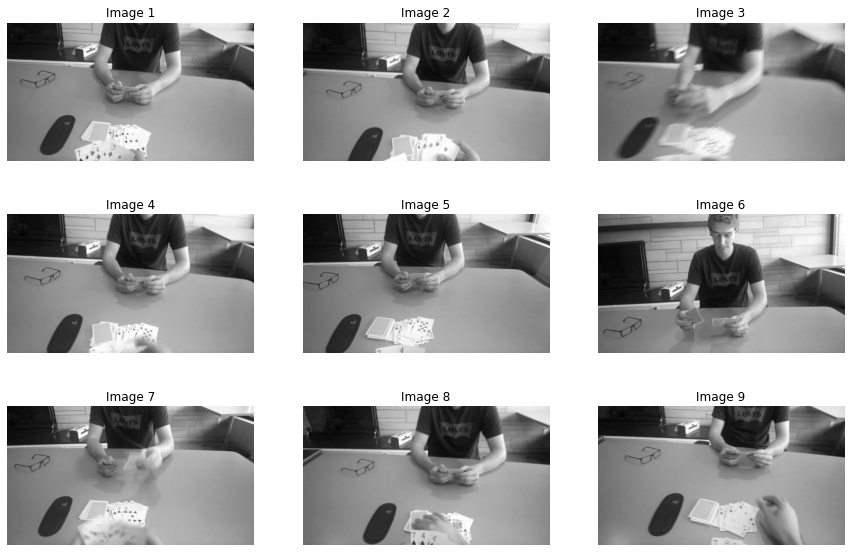

In [ ]:
# skimage.color.rgb2gray(an_img) <-- you may want to check this function


gray_scale_imgs = []
# Your code here
for img in imgs:
  gray_scale_imgs.append(skimage.color.rgb2gray(img))
##

# Use your draw function to visualize the images
draw_func(gray_scale_imgs) # assuming that gray_scale_imgs is the name of the list

# Apply histogram equalization on the gray scale images

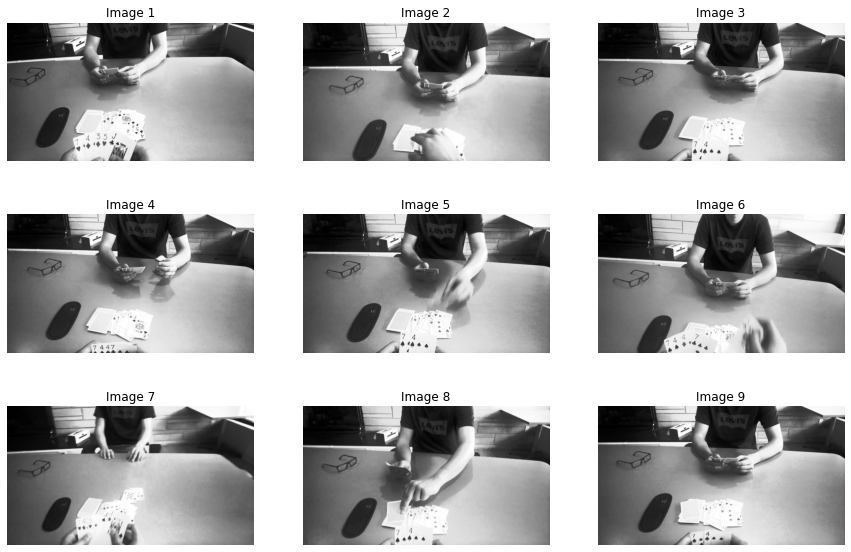

In [ ]:
from skimage import exposure # You will probably need this function

# Your code here
equ_imgs = []
for img in gray_scale_imgs:
  equ_imgs.append(exposure.equalize_hist(img))
##

# Use your draw function to visualize the images
draw_func(equ_imgs)

# Apply sobel edge detection on the equalized images

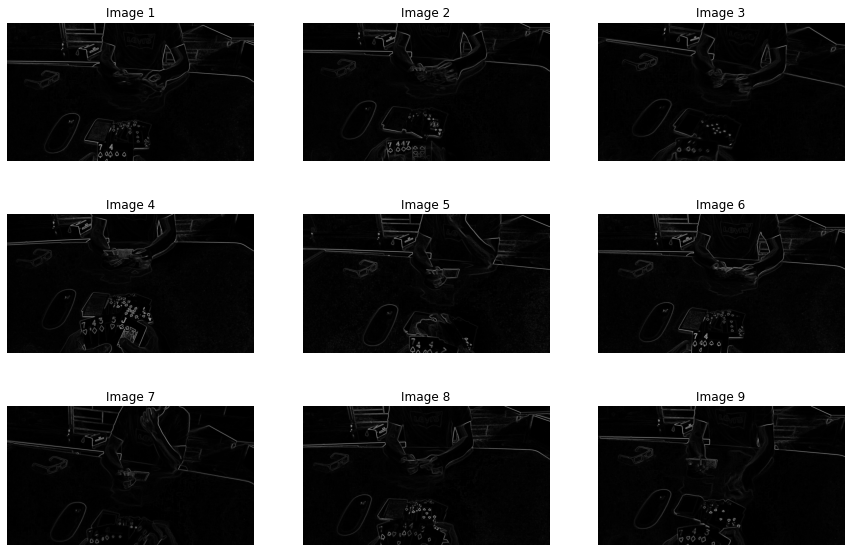

In [ ]:
from skimage.filters import sobel # You will probably need this function


# Your code here
sobel_imgs = []
for img in equ_imgs:
  sobel_imgs.append(sobel(img))
##


# Use your draw function to visualize the images
draw_func(sobel_imgs)

# Apply Gaussian derivative over the equalized images

In [ ]:
import scipy.ndimage
import math
from tqdm import tqdm

100%|██████████| 100/100 [00:26<00:00,  3.83it/s]


###### Magnitude ######


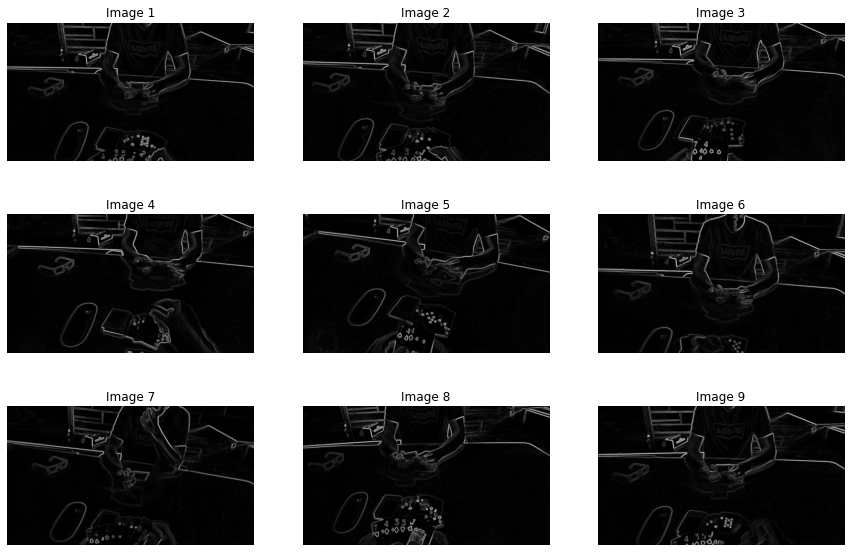

###### Angle######


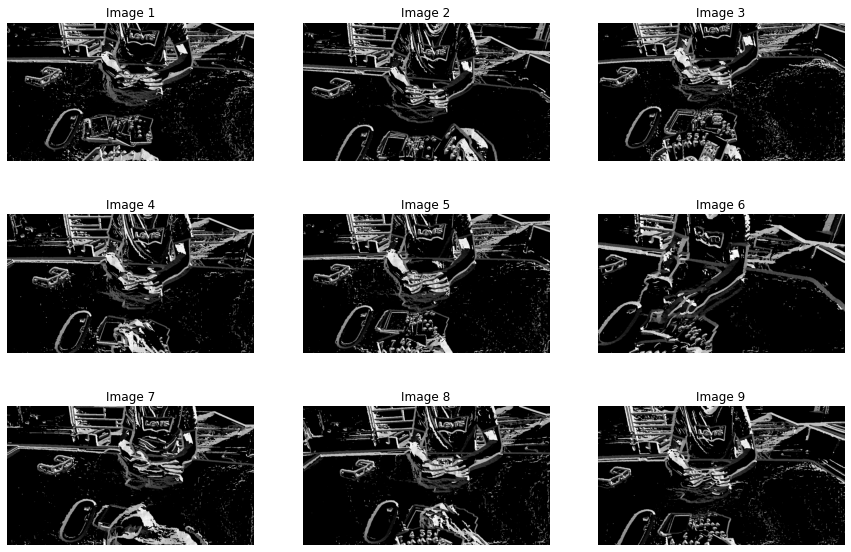

In [ ]:
# you better check lab 1 notebook

# Your code here

########### Create filters ##########:
weights = np.zeros((9, 9))
weights[4,4] = 1.0
gaussF = scipy.ndimage.filters.gaussian_filter(weights, 1.5, order=0,truncate=3.0)
#Sobel mask in x
weights = np.zeros((3,3))
weights[:,0] = -np.ones((3,)) 
weights[:,2] = np.ones((3,)) 
DoGx = scipy.ndimage.convolve(gaussF, weights)

#Sobel mask in y
weights = np.zeros((3,3))
weights[0,:] = np.ones((3,)) 
weights[2,:] = -np.ones((3,)) 
DoGy = scipy.ndimage.convolve(gaussF, weights)

########### Apply filters ##########:
mag_imgs = []
angle = []
for img in tqdm(equ_imgs):
  devX = scipy.ndimage.convolve(img, DoGx) # Derivative in the X direction
  devY = scipy.ndimage.convolve(img, DoGy) # Derivative in the Y direction

  mag = np.sqrt(np.square(devX) + np.square(devY)) # Obtain the magnitude
  mag_imgs.append(mag)

  angle_img = np.arctan2(-devY,devX) + math.pi # Obtain the angle
  non_edge_indices = mag < np.quantile(mag, .75) # Like a high pass filter??
  angle_img[non_edge_indices] = 0

  angle.append(angle_img)

##


# Use your draw function to visualize the magnitude
print("###### Magnitude ######")
draw_func(mag_imgs)

print("###### Angle######")
# Use your draw function to visualize the orientation
draw_func(angle)

In [ ]:
np.quantile(mag, .75)

0.026015174578888994

# Bonus: Search for super pixeling and apply it

In [ ]:
# Your code here
super_pixels = ...
##

# Use your draw function to visualize the results
draw_func(super_pixels)